In this notebook we will use dimensionality reduction techniques for EDA. The two techniques used here are t-Distributed Stochastic Neighbor Embedding (t-SNE) and Principal component Analysis (PCA) from sklearn library. 

In [1]:
# Change working directory to C://Practicuum Project 2//BBCTextClassification
import os
os.chdir('C://Practicuum Project 2//BBCTextClassification/data')
print(os.getcwd())

C:\Practicuum Project 2\BBCTextClassification\data


In [2]:
import pandas as pd
df = pd.read_csv('bbc-text.csv')

In [3]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]

0    0
1    1
2    2
3    2
4    3
5    4
6    4
7    2
8    2
9    3
Name: category_id, dtype: int64

In [4]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
 
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.text).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.category_id                           # represents the category of each of the 1490 articles

In [12]:
import numpy as np

from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

Plot the 2-dimensional ditribution identified by t-SNE

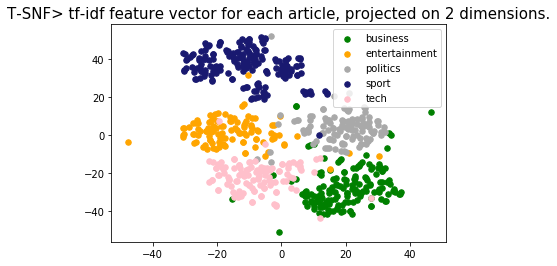

In [13]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)

plt.title("T-SNF> tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [8]:
from sklearn.decomposition import PCA

In [9]:
projected_features = PCA(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

Plot the 2-dimensional ditribution identified by pca

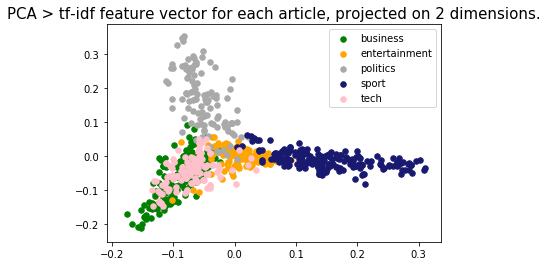

In [10]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("PCA > tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

References: 

Pathak, Manish. Sept 13th 2018. Introduction to t-SNE. Retrieved from https://www.datacamp.com/community/tutorials/introduction-t-sne

https://www.kaggle.com/bbose71/bbc-news-classification
